#Import package

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tqdm import tqdm
import pandas as pd
import math
import copy


In [2]:
img=imread('/content/drive/MyDrive/DL/HW1/images/n02113712/n02113712_10008.JPEG',as_gray=True)

In [3]:
img.shape

(256, 386)

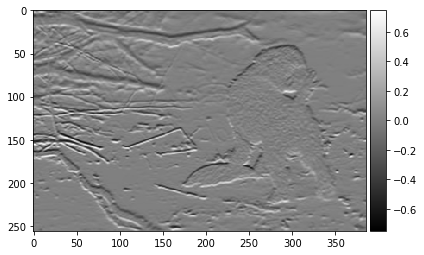

In [4]:
edges_h = prewitt_h(img)
edges_v = prewitt_v(img)
imshow(edges_h,cmap='gray')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read txt

In [ ]:
train = open("/content/drive/MyDrive/DL/HW1/train.txt","r")
train_file = train.readlines()
train.close

<function TextIOWrapper.close()>

In [ ]:
test = open("/content/drive/MyDrive/DL/HW1/test.txt","r")
test_file = test.readlines()
#print(test_file)
test.close

<function TextIOWrapper.close()>

In [ ]:
val = open("/content/drive/MyDrive/DL/HW1/val.txt","r")
val_file = val.readlines()
val.close

<function TextIOWrapper.close()>

#Haar-like    
prewitt

https://kknews.cc/zh-tw/tech/em244ar.html

In [ ]:
train_x = []
train_y = []
x = 0

for i in tqdm(range(len(train_file))):
  (a1,a2) = train_file[i].strip().split()
  x += 1
  sum = 0
  a = 0
  b = 0
  img = imread(f'/content/drive/MyDrive/DL/HW1/{a1}',as_gray=True)
  edges_h = prewitt_h(img)
  edges_v = prewitt_v(img)
  for l in range(edges_h.shape[0]):
    for ll in range(edges_h.shape[1]):
      if edges_h[l,ll] >= 0:
        a += edges_h[l,ll]
      else:
        b += edges_h[l,ll]
  sum = a - b
  label = a2
  train_x.append(sum)
  train_y.append(label)

train_x = np.array(train_x)
np.save('/content/drive/MyDrive/DL/HW1/trainx.npy',train_x)
train_y = np.array(train_y)
np.save('/content/drive/MyDrive/DL/HW1/trainy.npy',train_y)

 13%|█▎        | 7975/63325 [39:26<3:57:04,  3.89it/s]/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
 76%|███████▌  | 47866/63325 [3:57:27<1:10:10,  3.67it/s]/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:625: UserWarning: Metadata Warning, tag 33723 had too many entries: 11, expected 1
  warnings.warn(
 86%|████████▌ | 54425/63325 [4:30:36<49:02,  3.02it/s]/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))
100%|██████████| 63325/63325 [5:15:23<00:00,  3.35it/s]


In [ ]:
test_x = []
test_y = []
x = 0

for i in tqdm(range(len(test_file))):
  (a1,a2) = test_file[i].strip().split()
  x += 1
  sum = 0
  a = 0
  b = 0
  img = imread(f'/content/drive/MyDrive/DL/HW1/{a1}',as_gray=True)
  edges_h = prewitt_h(img)
  edges_v = prewitt_v(img)
  for l in range(edges_h.shape[0]):
    for ll in range(edges_h.shape[1]):
      if edges_h[l,ll] >= 0:
        a += edges_h[l,ll]
      else:
        b += edges_h[l,ll]
  sum = a - b
  label = a2
  test_x.append(sum)
  test_y.append(label)

test_x = np.array(test_x)
np.save('/content/drive/MyDrive/DL/HW1/testx.npy',test_x)
test_y = np.array(test_y)
np.save('/content/drive/MyDrive/DL/HW1/testy.npy',test_y)

100%|██████████| 450/450 [02:07<00:00,  3.54it/s]


In [ ]:
val_x = []
val_y = []
x = 0

for i in tqdm(range(len(val_file))):
  (a1,a2) = val_file[i].strip().split()
  x += 1
  sum = 0
  a = 0
  b = 0
  img = imread(f'/content/drive/MyDrive/DL/HW1/{a1}',as_gray=True)
  edges_h = prewitt_h(img)
  edges_v = prewitt_v(img)
  for l in range(edges_h.shape[0]):
    for ll in range(edges_h.shape[1]):
      if edges_h[l,ll] >= 0:
        a += edges_h[l,ll]
      else:
        b += edges_h[l,ll]
  sum = a - b
  label = a2
  val_x.append(sum)
  val_y.append(label)

val_x = np.array(val_x)
np.save('/content/drive/MyDrive/DL/HW1/valx.npy',val_x)
val_y = np.array(val_y)
np.save('/content/drive/MyDrive/DL/HW1/valy.npy',val_y)

100%|██████████| 450/450 [02:10<00:00,  3.45it/s]


#Training

##K-Nearest Neighbors
https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76






In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [81]:
X_train = np.load('/content/drive/MyDrive/DL/HW1/trainx.npy')
Y_train = np.load('/content/drive/MyDrive/DL/HW1/trainy.npy')
X_test = np.load('/content/drive/MyDrive/DL/HW1/testx.npy')
Y_test = np.load('/content/drive/MyDrive/DL/HW1/testy.npy')
X_val = np.load('/content/drive/MyDrive/DL/HW1/valx.npy')
Y_val = np.load('/content/drive/MyDrive/DL/HW1/valy.npy')

x_train = np.reshape(X_train, (-1,1))
y_train = np.reshape(Y_train, (len(Y_train),1))
x_test = np.reshape(X_test, (-1,1))
y_test = np.reshape(Y_test, (len(Y_test),1))
x_val = np.reshape(X_val, (-1,1))
y_val = np.reshape(Y_val, (len(Y_val),1))

In [87]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred = knn_clf.predict(x_test)
ypred_val = knn_clf.predict(x_val)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
result = confusion_matrix(y_test,ypred)
print(result)

In [88]:
accuracy_test = accuracy_score(y_test,ypred)
print('test accuracy: ',accuracy_test)
accuracy_val = accuracy_score(y_val,ypred_val)
print('val accuracy: ',accuracy_val)

test accuracy:  0.028888888888888888
val accuracy:  0.02666666666666667


##SVM

In [89]:
X_train = np.load('/content/drive/MyDrive/DL/HW1/trainx.npy')
Y_train = np.load('/content/drive/MyDrive/DL/HW1/trainy.npy')
X_test = np.load('/content/drive/MyDrive/DL/HW1/testx.npy')
Y_test = np.load('/content/drive/MyDrive/DL/HW1/testy.npy')
X_val = np.load('/content/drive/MyDrive/DL/HW1/valx.npy')
Y_val = np.load('/content/drive/MyDrive/DL/HW1/valy.npy')

x_train = np.reshape(X_train, (-1,1))
y_train = np.reshape(Y_train, (len(Y_train),1))
x_test = np.reshape(X_test, (-1,1))
y_test = np.reshape(Y_test, (len(Y_test),1))
x_val = np.reshape(X_val, (-1,1))
y_val = np.reshape(Y_val, (len(Y_val),1))

In [105]:
a1 = np.zeros((len(x_train),1))
a2 = np.zeros((len(x_test),1))
a3 = np.zeros((len(x_val),1))

In [106]:
x_train = np.concatenate([x_train,a1],axis = 1)
x_test = np.concatenate([x_test,a2],axis = 1)
x_val = np.concatenate([x_val,a3],axis = 1)

In [117]:
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)
X_val_std = sc.transform(x_val)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_std,y_train)

In [119]:
ypred = clf.predict(X_test_std)
ypred_val = clf.predict(X_val_std)

In [120]:
accuracy_test = accuracy_score(y_test,ypred)
print('test accuracy: ',accuracy_test)
accuracy_val = accuracy_score(y_val,ypred_val)
print('val accuracy: ',accuracy_val)

test accuracy:  0.06222222222222222
val accuracy:  0.042222222222222223


##Decision Tree

https://ithelp.ithome.com.tw/articles/10187191

In [121]:
from sklearn import tree
from sklearn import metrics

In [122]:
X_train = np.load('/content/drive/MyDrive/DL/HW1/trainx.npy')
Y_train = np.load('/content/drive/MyDrive/DL/HW1/trainy.npy')
X_test = np.load('/content/drive/MyDrive/DL/HW1/testx.npy')
Y_test = np.load('/content/drive/MyDrive/DL/HW1/testy.npy')
X_val = np.load('/content/drive/MyDrive/DL/HW1/valx.npy')
Y_val = np.load('/content/drive/MyDrive/DL/HW1/valy.npy')

x_train = np.reshape(X_train, (-1,1))
y_train = np.reshape(Y_train, (len(Y_train),1))
x_test = np.reshape(X_test, (-1,1))
y_test = np.reshape(Y_test, (len(Y_test),1))
x_val = np.reshape(X_val, (-1,1))
y_val = np.reshape(Y_val, (len(Y_val),1))

In [123]:
clf = tree.DecisionTreeClassifier()
train_clf = clf.fit(x_train,y_train)
ypred_testDT = train_clf.predict(x_test)
ypred_valDT = train_clf.predict(x_val)

In [125]:
accuracy = metrics.accuracy_score(y_test,ypred_testDT)
print('test accuracy: ',accuracy)
accuracy_val = accuracy_score(y_val,ypred_valDT)
print('val accuracy: ',accuracy_val)

test accuracy:  0.035555555555555556
val accuracy:  0.03333333333333333


#XGBoost

https://ithelp.ithome.com.tw/articles/10273094?sc=iThomeR

In [ ]:
X_train = np.load('/content/drive/MyDrive/DL/HW1/trainx.npy')
Y_train = np.load('/content/drive/MyDrive/DL/HW1/trainy.npy')
X_test = np.load('/content/drive/MyDrive/DL/HW1/testx.npy')
Y_test = np.load('/content/drive/MyDrive/DL/HW1/testy.npy')
X_val = np.load('/content/drive/MyDrive/DL/HW1/valx.npy')
Y_val = np.load('/content/drive/MyDrive/DL/HW1/valy.npy')

In [ ]:
from xgboost import XGBClassifier
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)

In [ ]:
x_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(Y_train.astype(float))
x_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(Y_test.astype(float))
x_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(Y_val.astype(float))

In [ ]:
xgboostModel.fit(x_train, y_train)

In [ ]:
predicted = xgboostModel.predict(x_train)

In [ ]:
predicted

In [ ]:
print('train: ',xgboostModel.score(x_train,y_train))
print('test: ',xgboostModel.score(x_test,y_test))
print('val: ',xgboostModel.score(x_val,y_val))

train:  0.14682984603237267
test:  0.03777777777777778
val:  0.028888888888888888
